In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('tab10')

In [2]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#clearn database

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


|||Database.isnull().sum()||
|-|-|-|-|
|columns|embark_town|age|deck|
|isnull.sum()|2|177|688|

In [5]:
titanic['embark_town']= titanic['embark_town'].fillna('Unknown') 

In [6]:
titanic['embarked']= titanic['embarked'].fillna('U') 

In [7]:
titanic['deck']= titanic['deck'].cat.add_categories('Unknown')

In [8]:
titanic['deck']= titanic['deck'].fillna('Unknown') 

In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

In [10]:
titanic['age'] = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [11]:
titanic['age'].isnull().sum()

11

<AxesSubplot:>

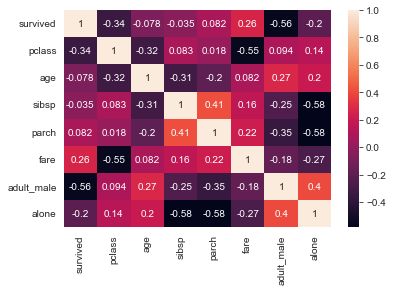

In [12]:
sns.heatmap(titanic.corr(), annot=True)

In [13]:
titanic['age'] = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age']
#fillna one more time wiwth same sibsp and parchh

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [14]:
child_age = titanic[titanic['who'] == 'child']['age'].mean()

In [15]:
titanic.age = titanic.age.fillna(child_age)

In [16]:
# Feature expection 

<AxesSubplot:xlabel='age', ylabel='Count'>

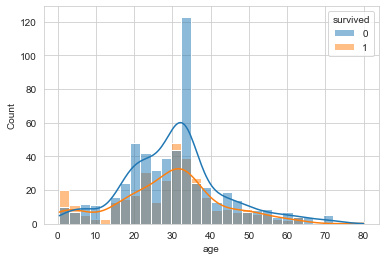

In [17]:
sns.histplot(data = titanic, x= 'age', kde = True, hue = 'survived')

In [18]:
titanic.age.describe() #why because we take mean of them before

count    891.000000
mean      29.945476
std       13.342194
min        0.420000
25%       22.000000
50%       31.084211
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [19]:
age_groups = [0,15,25,45,70,100]
titanic['age_groups'] = pd.cut(titanic['age'], bins= age_groups)

In [20]:
age_groups = [0,15,25,45,60,70,100] #0-15 trẻ em, 15-25 teenager...
pd.cut(titanic['age'], bins= age_groups)
titanic['age_groups'] = pd.cut(titanic['age'], bins= age_groups) # Học lại bài phân nhóm
#0 and 100 is lowerboad and uperbound

In [21]:
titanic['age_groups']

0      (15, 25]
1      (25, 45]
2      (25, 45]
3      (25, 45]
4      (25, 45]
         ...   
886    (25, 45]
887    (15, 25]
888    (25, 45]
889    (25, 45]
890    (25, 45]
Name: age_groups, Length: 891, dtype: category
Categories (6, interval[int64, right]): [(0, 15] < (15, 25] < (25, 45] < (45, 60] < (60, 70] < (70, 100]]

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

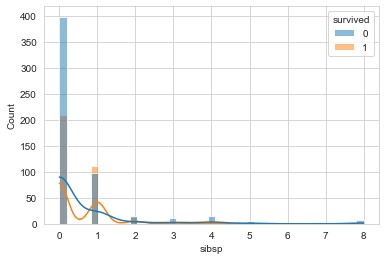

In [22]:
sns.histplot(data = titanic, x= 'sibsp', kde = True, hue = 'survived')

<AxesSubplot:xlabel='parch', ylabel='Count'>

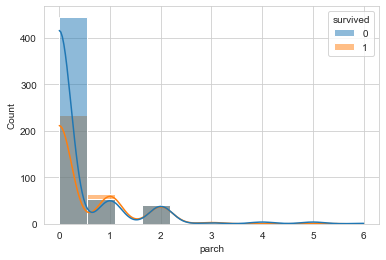

In [23]:
sns.histplot(data = titanic, x= 'parch', kde = True, hue = 'survived')

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

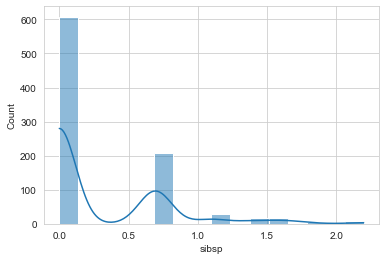

In [24]:
sns.histplot(np.log1p(titanic['sibsp']), kde = True)

In [25]:
#Do giá trị discrease quá ít nên lấy log quá ít nên save as defaults

<AxesSubplot:xlabel='parch', ylabel='Count'>

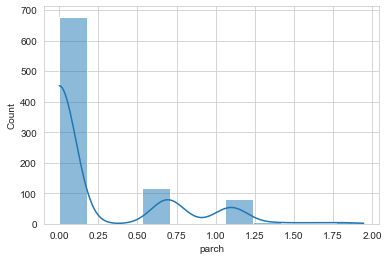

In [26]:
sns.histplot(np.log1p(titanic['parch']), kde = True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

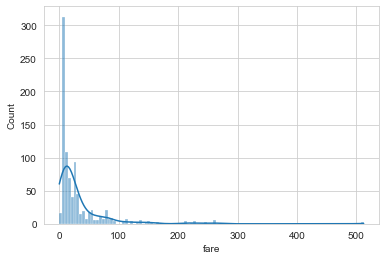

In [27]:
sns.histplot(titanic['fare'], kde = True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

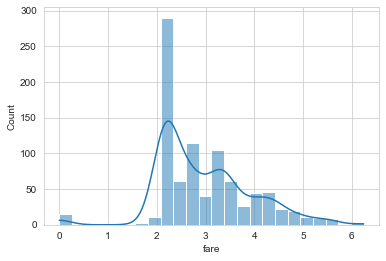

In [28]:
sns.histplot(np.log1p(titanic['fare']), kde = True)

In [29]:
titanic['log_fare']=np.log1p(titanic['fare'])

In [30]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,log_fare
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,"(15, 25]",2.110213
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(25, 45]",4.280593
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,"(25, 45]",2.188856
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 45]",3.990834
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,"(25, 45]",2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Unknown,Southampton,no,True,"(25, 45]",2.639057
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(15, 25]",3.433987
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,False,Unknown,Southampton,no,False,"(25, 45]",3.196630
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(25, 45]",3.433987


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_groups   891 non-null    category
 16  log_fare     891 non-null    float64 
dtypes: bool(2), category(3), float64(3), int64(4), object(5)
memory usage: 88

![]('Note1.png')

In [32]:
# One-hot encoding

In [33]:
# xử lý dữ liệu phân loại và dữ liệu text nếu có 

In [34]:
#sex, adult_male and alone

In [35]:
titanic['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [36]:
# titanic.loc[(titanic.sex == 'male'),'sex']= 0
# titanic.loc[(titanic.sex == 'female'),'sex']= 1

In [37]:
titanic['gender']= titanic['sex'].map({'male':0,'female':1})

In [38]:
titanic['adult_male'] = titanic['adult_male'].astype(int)#True =1 False =0
titanic['alone'] = titanic['alone'].astype(int)#True =1 False =0
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int64   
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    int64   
 15  age_groups   891 non-null    category
 16  log_fare     891 non-null    float64 
 17  gender       891 non-null    int64   
dtypes: category(3), float64(3), in

In [39]:
#Facetgrid

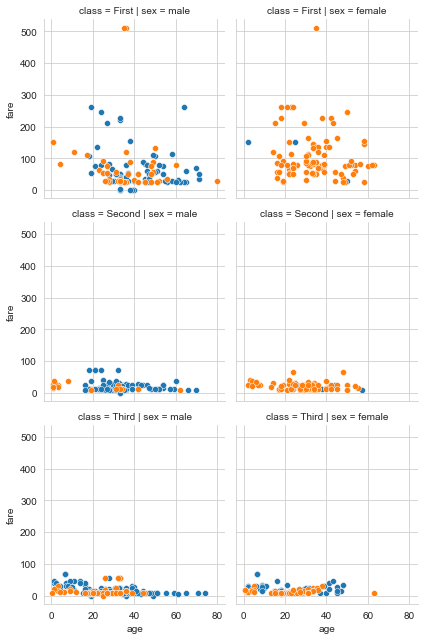

In [40]:
import seaborn as sns
facet_grid = sns.FacetGrid(data=titanic, row='class', col='sex', hue='survived')
facet_grid.map(sns.scatterplot, 'age', 'fare')

In [41]:
filter1 = titanic['class'].str.lower().isin(['First','Second'])
filter2 = titanic['gender'] == 1

In [42]:
titanic['female_class']=(filter1 & filter2).astype(int)

In [43]:
titanic.to_csv('preprocessing.csv')

In [44]:
#Technics of one-hot incoding 
# a b c
# 1 0 0 (A)
# 0 1 0 (B)
# 0 0 1 (C)

In [45]:
encoded = pd.get_dummies(titanic[['deck','embarked','who','class','age_groups']])
#technics nay tao them du lieu moi

In [46]:
titanic = titanic.join(encoded)

In [47]:
titanic.to_csv('preprocessing2.csv')

In [48]:
titanic = titanic.drop(columns = ['deck','embarked','who','class','age_groups','embark_town', 'sex','fare', 'alive','embarked'])

In [49]:
titanic.head()

,survived,pclass,age,sibsp,parch,adult_male,alone,log_fare,gender,female_class,...,who_woman,class_First,class_Second,class_Third,"age_groups_(0, 15]","age_groups_(15, 25]","age_groups_(25, 45]","age_groups_(45, 60]","age_groups_(60, 70]","age_groups_(70, 100]"
0,0,3,22.0,1,0,1,0,2.110213,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,1,38.0,1,0,0,0,4.280593,1,0,...,1,1,0,0,0,0,1,0,0,0
2,1,3,26.0,0,0,0,1,2.188856,1,0,...,1,0,0,1,0,0,1,0,0,0
3,1,1,35.0,1,0,0,0,3.990834,1,0,...,1,1,0,0,0,0,1,0,0,0
4,0,3,35.0,0,0,1,1,2.202765,0,0,...,0,0,0,1,0,0,1,0,0,0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [51]:
X, y = titanic.drop(columns = 'survived'), titanic['survived']
display(X,y)

,pclass,age,sibsp,parch,adult_male,alone,log_fare,gender,female_class,deck_A,...,who_woman,class_First,class_Second,class_Third,"age_groups_(0, 15]","age_groups_(15, 25]","age_groups_(25, 45]","age_groups_(45, 60]","age_groups_(60, 70]","age_groups_(70, 100]"
0,3,22.000000,1,0,1,0,2.110213,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,38.000000,1,0,0,0,4.280593,1,0,0,...,1,1,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,0,1,2.188856,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,1,35.000000,1,0,0,0,3.990834,1,0,0,...,1,1,0,0,0,0,1,0,0,0
4,3,35.000000,0,0,1,1,2.202765,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,1,1,2.639057,0,0,0,...,0,0,1,0,0,0,1,0,0,0
887,1,19.000000,0,0,0,1,3.433987,1,0,0,...,1,1,0,0,0,1,0,0,0,0
888,3,31.333333,1,2,0,0,3.196630,1,0,0,...,1,0,0,1,0,0,1,0,0,0
889,1,26.000000,0,0,1,1,3.433987,0,0,0,...,0,1,0,0,0,0,1,0,0,0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42)
display(x_train, y_train, x_test, y_test)

,pclass,age,sibsp,parch,adult_male,alone,log_fare,gender,female_class,deck_A,...,who_woman,class_First,class_Second,class_Third,"age_groups_(0, 15]","age_groups_(15, 25]","age_groups_(25, 45]","age_groups_(45, 60]","age_groups_(60, 70]","age_groups_(70, 100]"
298,1,32.973597,0,0,1,1,3.449988,0,0,0,...,0,1,0,0,0,0,1,0,0,0
884,3,25.000000,0,0,1,1,2.085672,0,0,0,...,0,0,0,1,0,1,0,0,0,0
247,2,24.000000,0,2,0,0,2.740840,1,0,0,...,1,0,1,0,0,1,0,0,0,0
478,3,22.000000,0,0,1,1,2.142510,0,0,0,...,0,0,0,1,0,1,0,0,0,0
305,1,0.920000,1,2,0,0,5.027492,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,0,1,2.157559,1,0,0,...,1,0,0,1,0,1,0,0,0,0
270,1,32.973597,0,0,1,1,3.465736,0,0,0,...,0,1,0,0,0,0,1,0,0,0
860,3,41.000000,2,0,1,0,2.715244,0,0,0,...,0,0,0,1,0,0,1,0,0,0
435,1,14.000000,1,2,0,0,4.795791,1,0,0,...,0,1,0,0,1,0,0,0,0,0


298    1
884    0
247    1
478    0
305    1
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 668, dtype: int64

,pclass,age,sibsp,parch,adult_male,alone,log_fare,gender,female_class,deck_A,...,who_woman,class_First,class_Second,class_Third,"age_groups_(0, 15]","age_groups_(15, 25]","age_groups_(25, 45]","age_groups_(45, 60]","age_groups_(60, 70]","age_groups_(70, 100]"
709,3,36.000000,1,1,1,0,2.787834,0,0,0,...,0,0,0,1,0,0,1,0,0,0
439,2,31.000000,0,0,1,1,2.442347,0,0,0,...,0,0,1,0,0,0,1,0,0,0
840,3,20.000000,0,0,1,1,2.188856,0,0,0,...,0,0,0,1,0,1,0,0,0,0
720,2,6.000000,0,1,0,0,3.526361,1,0,0,...,0,0,1,0,1,0,0,0,0,0
39,3,14.000000,1,0,0,0,2.504848,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,2,25.000000,0,1,0,0,3.295837,1,0,0,...,1,0,1,0,0,1,0,0,0,0
425,3,32.973597,0,0,1,1,2.110213,0,0,0,...,0,0,0,1,0,0,1,0,0,0
101,3,32.973597,0,0,1,1,2.185579,0,0,0,...,0,0,0,1,0,0,1,0,0,0
199,2,24.000000,0,0,0,1,2.639057,1,0,0,...,1,0,1,0,0,1,0,0,0,0


709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: survived, Length: 223, dtype: int64

In [96]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
accuracy_score(y_pred, y_test)
#lot_confusion_matrix(tree,x_test,y_test)

0.7713004484304933

In [97]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier ()
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
accuracy_score(y_pred, y_test)
#lot_confusion_matrix(forest,x_test,y_test)

0.7892376681614349

In [98]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_pred, y_test)
#lot_confusion_matrix(svc,x_test,y_test)

0.7354260089686099

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def check_method(x_train,y_train,x_test,y_test):
    tree = DecisionTreeClassifier()
    forest = RandomForestClassifier()
    svc=SVC()

    tree.fit(x_train,y_train)
    forest.fit(x_train,y_train)
    svc.fit(x_train,y_train)

    y_pred_tree=tree.predict(x_test)
    y_pred_forest=forest.predict(x_test)
    y_pred_svc=svc.predict(x_test)

    print('Tree_accuracy{}'.format(accuracy_score(y_pred_tree,y_test)))
    print('Forest_accuracy{}'.format(accuracy_score(y_pred_forest,y_test)))
    print('Svc_accuracy{}'.format(accuracy_score(y_pred_svc,y_test)))
    #lot_confusion_matrix(tree,x_test,y_test)

In [100]:
check_method(x_train,y_train,x_test,y_test)

Tree_accuracy0.7802690582959642
Forest_accuracy0.8116591928251121
Svc_accuracy0.7354260089686099


In [101]:
#RobustScaler features
#nplog_features
#Turnning the model basing on Kfold and some method more and more to improve the method

In [102]:
n_feature = len(x_train.columns)

In [103]:
np.log2(n_feature)
n_feature/2

16.5

In [104]:
tree= DecisionTreeClassifier(
    max_depth =round(np.log2(n_feature)),
    max_features= round(n_feature/2)
)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
accuracy_score(y_pred,y_test)

0.820627802690583

In [105]:
forest= RandomForestClassifier(
    max_depth =round(np.log2(n_feature)),
    max_features= round(n_feature/2)
)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)
accuracy_score(y_pred,y_test)

0.8251121076233184

In [106]:
RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

RandomForestClassifier()

In [107]:
svc= SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_pred,y_test)

0.7354260089686099

In [111]:
import tensorflow
import keras
n_features = 32
model = keras.Sequential()

In [112]:
input_layer = keras.layers.InputLayer(n_features)
model.add(input_layer)
dense_layer1 = keras.layers.Dense(int(n_features/2), activation='relu')
model.add(dense_layer1)
dense_layer2 = keras.layers.Dense(int(np.sqrt(n_features)), activation='relu')
model.add(dense_layer2)
output_layer = keras.layers.Dense(1, activation='sigmoid')                            
model.add(output_layer)

In [114]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)
model.fit(x_train, y_train, batch_size=150, epochs=90)

Epoch 1/90


ValueError: in user code:

    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/anaconda3/envs/anthony/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: expected axis -1 of input shape to have value 32 but received input with shape (None, 33)


In [115]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
    max_depth =round(np.log2(n_feature)),
    max_features= round(n_feature/2)
)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
accuracy_score(y_test,y_pred)

0.8071748878923767

In [116]:
pd.Series(forest.feature_importances_, index = x_train.columns).sort_values(ascending = False)

adult_male              0.184990
who_man                 0.168717
gender                  0.110948
log_fare                0.108704
class_Third             0.076795
pclass                  0.073792
age                     0.067675
who_woman               0.046916
sibsp                   0.034816
deck_Unknown            0.023247
class_Second            0.010689
embarked_S              0.009743
parch                   0.009388
deck_E                  0.009267
class_First             0.008415
embarked_C              0.008259
deck_C                  0.006031
deck_D                  0.005834
who_child               0.004783
age_groups_(25, 45]     0.004485
alone                   0.004061
age_groups_(60, 70]     0.004046
age_groups_(0, 15]      0.003475
age_groups_(15, 25]     0.003200
deck_B                  0.003117
age_groups_(45, 60]     0.002227
embarked_Q              0.001664
deck_F                  0.001531
age_groups_(70, 100]    0.001268
deck_G                  0.001214
deck_A    

In [117]:
#Tunning on Tensorflow 
#Thay đổi hàm actiavtion 
#Thay đổi headdenlayer
#Viet lop để thử

In [ ]:
#Muốn phát triển toán cao cấp 
#Sác xuất thống kê 